### Craps Game Code

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import collections

In [51]:
def rollDice():
    # Returns a value 1-12 based on rolling two fair 6 sided dice
    return random.randint(1, 6) + random.randint(1, 6)

### Histogram dice rolls probability

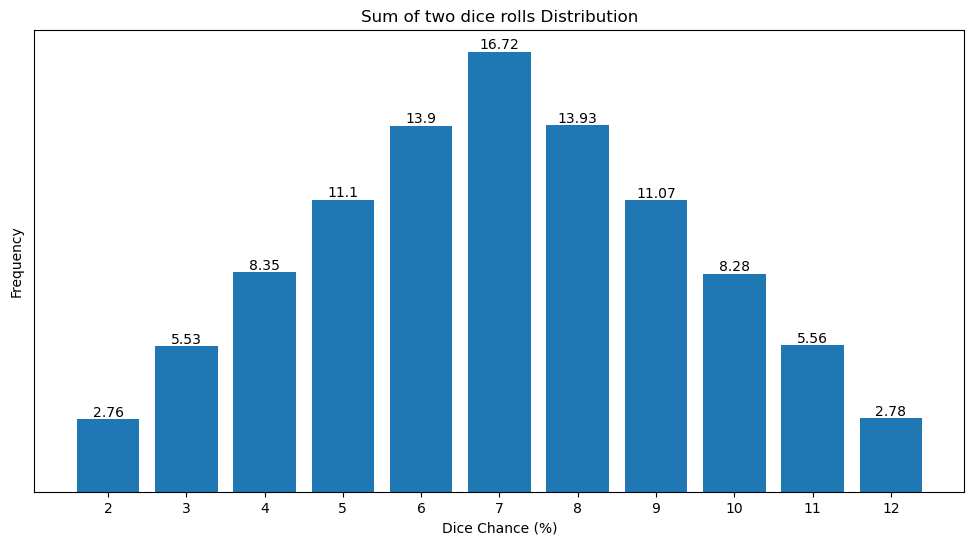

In [298]:
n = 999999
rolls = []

for i in range(n):
    rolls.append(rollDice())

fig, ax = plt.subplots()
c = collections.Counter(rolls)
c = sorted(c.items())
freq = [i[1] for i in c]
prob = [round((i[1] / len(rolls) * 100), 2) for i in c]
bar = plt.bar(range(2, 13), freq)
plt.title("Sum of two dice rolls Distribution")
plt.xlabel("Dice Chance (%)")
plt.ylabel("Frequency")
ax.bar_label(bar, labels = prob)
ax.set_xticks(range(2, 13))
ax.set_yticks([])
ax.set_xticklabels(range(2, 13))
fig.set_size_inches(12, 6)
plt.show()

In [207]:
def roll2Dice():
    # returns a tuple of 2 rolls of die combo with unique values
    return(str(sorted((random.randint(1, 6), random.randint(1, 6))))[1:-1])

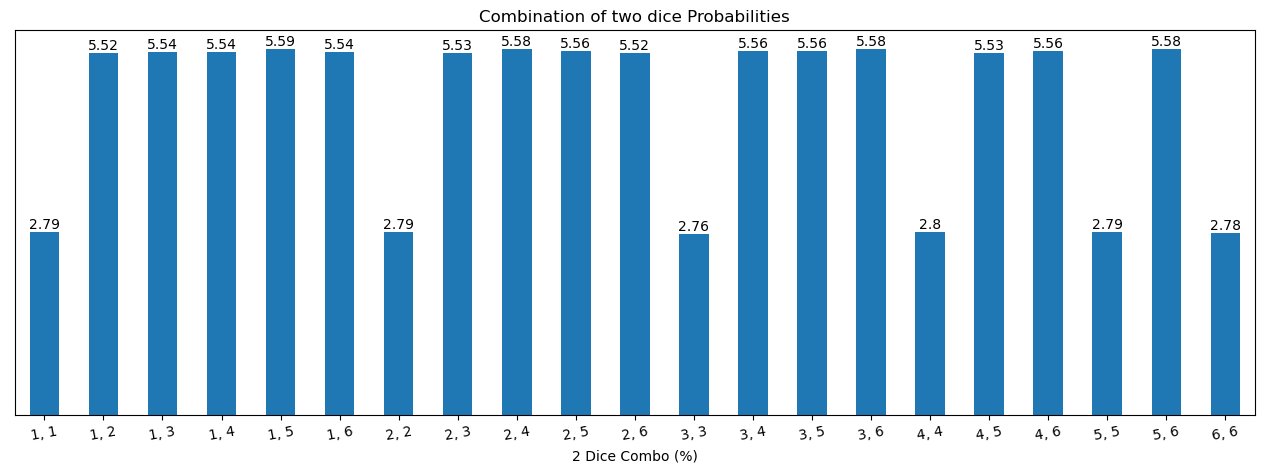

In [268]:
n = 999999
rolls = []

for i in range(n):
    # returns a tuple of 2 rolls of die combo with unique values
    rolls.append(roll2Dice())
    
c = collections.Counter(rolls)
c = sorted(c.items())
dice_combo = [i[0] for i in c]
freq = [i[1] for i in c]
prob = [round((i[1] / len(rolls) * 100), 2) for i in c]
df = pd.DataFrame({'Dice Combo': dice_combo,
                   'Value': freq,
                   'Probability': prob})
df.set_index('Dice Combo', inplace=True)
df.sort_values(['Dice Combo'], inplace=True) # add 'Value', to sort for better line
ax = df.iloc[:, 1].plot.bar(rot=5, figsize=(16, 5))
plt.xticks(rotation=10, horizontalalignment="center")
plt.title("Combination of two dice Probabilities")
plt.xlabel("2 Dice Combo (%)")
ax.bar_label(ax.containers[0])
ax.set_yticks([])
plt.ylabel("")
fig.set_size_inches(12, 6)

## Analyzing Odds

When analyzing odds, we will start at 0 and change depending on if the bet wins or loses the balance. Each bet will be valued at 1. This way is more intuitive to view in graph (almost like random markov chain) form.
Of course, the theoretical probabilities are already known, so we will simulate further.

### Any next roll

Betting on what the dice will be for the next roll

##### Field Bet

In [396]:
def fieldBet():
    # field: 
    #    (2x/3x win) 2, 12
    #    (win) 3, 4, 9, 10, 11
    #    (lose) 5, 6, 7, 8
    roll = rollDice()
    if roll == 12:
        return 3
    elif roll == 2:
        return 2
    elif roll in [3, 4, 9, 10, 11]:
        return 1
    elif roll in [5, 6, 7, 8]:
        return -1
    else:
        return "ERROR"

In [450]:
x[-1]

14

Text(0, 0.5, '$S_{n}$')

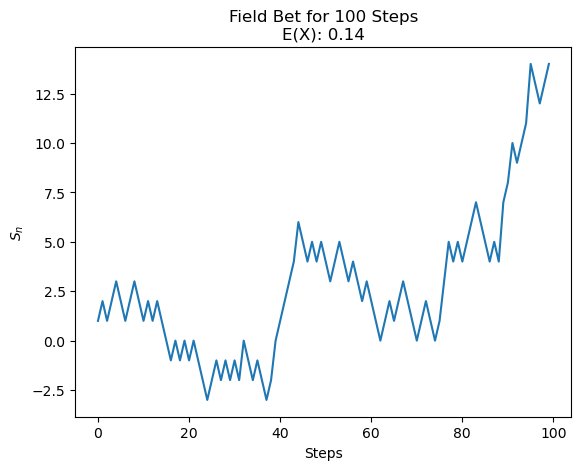

In [449]:
n = 100 # can change this
start = 0
x = []
for i in range(n):
    step = fieldBet()
    start = start + step
    x.append(start)
eX = x[-1] / n
plt.plot(x)
plt.title(str("Field Bet for " + str(n) + " Steps\nE(X): " + str(eX)))
plt.xlabel('Steps')
plt.ylabel(r'$S_{n}$')

##### Bigger n for closer true theoretical E(X)

In [429]:
n = 999999
start = 0
x = []
for i in range(n):
    step = fieldBet()
    start = start + step
    x.append(start)
eX = x[-1] / n
print(str("Field Bet for " + str(n) + " Steps\nE(X): " + str(round(eX, 4))))
print("This means that for every $1, you will expect to roughly net " + str(round(eX, 2)) + " over the long run")
print("The house has roughly a " + str(round(eX * 100, 4)) + "% house advantage")

Field Bet for 999999 Steps
E(X): -0.0268
This means that for every $1, you will expect to roughly net -0.03 over the long run
The house has roughly a -2.6816% house advantage


### First roll of dice

Bets on craps first roll

### Second roll of dice+

Bets on craps second roll and beyond

In [211]:
# -- any (next) roll --
# field: 
#    (2x/3x win) 2, 12
#    (win) 3, 4, 9, 10, 11
#    (lose) 5, 6, 7, 8

# duplicate numbers:
#    (2, 2):
#    (3, 3):
#    (4, 4):
#    (5, 5):
# horn bets:
#    (1, 1):
#    (1, 2):
#    (5, 6):
#    (6, 6):
#    (all):
# any craps:
#    (win) 2, 3, 12
#    (lose) 4, 5, 6, 7, 8, 9, 10, 11
# any craps + e (C & E):
#    (win) 2, 3, 11, 12
#    (lose) 4, 5, 6, 7, 8, 9, 10
# big red:
#    (win) 7
#    (lose) 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

# -- first roll --
# pass line: 
#    (win) 7, 11
#    (lose) 2, 3, 12
#    (continues) if rolled anything else
# don't pass line: 
#    (win) 2, 3
#    (lose) 2, 3
#    (tie) 12
# pass line: continues if rolled anything else

# -- second roll --
# pass line: 
#    (win) rolled same dice as first
#    (lose) 7
#    (repeats) if rolled anything else
# don't pass line: 
#    (win) 7
#    (lose) rolled same dice as first
#    (repeats) if rolled anything else
# come: 
#    (win) if 7, 11
#    (lose) if rolled anything else
# odds:
#    (win) 4, 10
#    (win) 5, 9
#    (win) 6, 8